In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: For a $n\times n$ unitary matrix $U$, so that $U^{-1}=U^{\dagger}$ show that 

$$
\left|\left|U{\bf x}\right|\right| = \left|\left|{\bf x}\right|\right|, ~ {\bf x}\in \mathbb{C}^{n}
$$

Please explain in words what this means.  

$$
\|Ux\|^2 = \langle Ux, Ux \rangle = \langle U^{\dagger}Ux, x \rangle = \langle Ix, x \rangle = \langle x, x \rangle = \|x\|^2.
$$

$$
\text{Since } \|Ux\|^2 = \|x\|^2,\ \ \|Ux\| = \|x\|.
$$

$$
\therefore\ \text{U doesn't change the size of the matrix, it just rotates it } \square
$$

**Problem 2**: For the matrix $A:\mathbb{R}^{2}\rightarrow \mathbb{R}^{3}$ where 

$$
A = \begin{pmatrix} 1 & 3 \\ 3 & 2 \\ 1 & 2 \end{pmatrix}
$$

using `np.linalg.svd`, numerically compute its full and economy SVD.

* Explain, as in literally show, the differences between the economy and full SVD.  
* Using `np.linalg.norm` test the orthonomality of the orthogonal matrices in your SVD.  Comment on what you find.  

## Full vs Economy SVD

In [9]:
A = np.array([[1,3],[3,2],[1,2]])
U_full,D_full,V_full = np.linalg.svd(A)
U_econ,D_econ,V_econ = np.linalg.svd(A, full_matrices = False)
print('Full SVD of A:')
print('U:')
print(U_full)
print('D:')
print(D_full)
print('V:')
print(V_full)
print('============================')
print('Economy SVD of A:')
print('U:')
print(U_econ)
print('D:')
print(D_econ)
print('V:')
print(V_econ)



Full SVD of A:
U:
[[-0.59347314  0.63668312 -0.49236596]
 [-0.67666349 -0.72593045 -0.12309149]
 [-0.43579372  0.26011458  0.86164044]]
D:
[5.0400153  1.61190749]
V:
[[-0.60699365 -0.79470668]
 [-0.79470668  0.60699365]]
Economy SVD of A:
U:
[[-0.59347314  0.63668312]
 [-0.67666349 -0.72593045]
 [-0.43579372  0.26011458]]
D:
[5.0400153  1.61190749]
V:
[[-0.60699365 -0.79470668]
 [-0.79470668  0.60699365]]


We see that in the full svd, U gives us a 3x3 matrix but in the economy, we are left with a 3x2. This is because the economy svd only keeps $r$ columns, where $r = \text{rank}(A) \leq \min(m,n)$ where $m$ is number of rows, and $n$ is number of columns

## Orthonormality

In [21]:
print(np.linalg.norm((U_full.T @ U_full - np.eye(U_full.shape[1])).astype(np.float32)))
print(np.linalg.norm((V_full.T @ V_full - np.eye(V_full.shape[1])).astype(np.float32)))
print(np.linalg.norm((U_econ.T @ U_econ - np.eye(U_econ.shape[1])).astype(np.float32)))
print(np.linalg.norm((V_econ.T @ V_econ - np.eye(V_econ.shape[1])).astype(np.float32)))


7.8632017e-16
2.4960565e-16
7.7315923e-16
2.4960565e-16


From taking the norm of $U^{T}U - I$, $V^{T}V - I$, we see they are very close to zero. This means that U and V have orthonormal columns

**Problem 3**: For given real-valued, $n\times n$ square matrix $A$ with SVD $A=U\Sigma V^{T}$, if we order the singular values $\sigma_{j}$ such that $\sigma_{1}\geq \sigma_{2}\geq \cdots \geq \sigma_{n}$, then we define its *condition number*, say $c(A)$, to be 

$$
c(A) = \frac{\sigma_{1}}{\sigma_{n}}
$$

Note, if $A$ is not of full rank then $\sigma_{n}=0$ and $c(A)=\infty$.

For $2 \leq n \leq 30$, using `np.random.randn` which generates random matrices using a normal distribution, find the average condition number as a function of $n$.  Plot your results and comment upon them.  Use the code skeleton below to get started.  

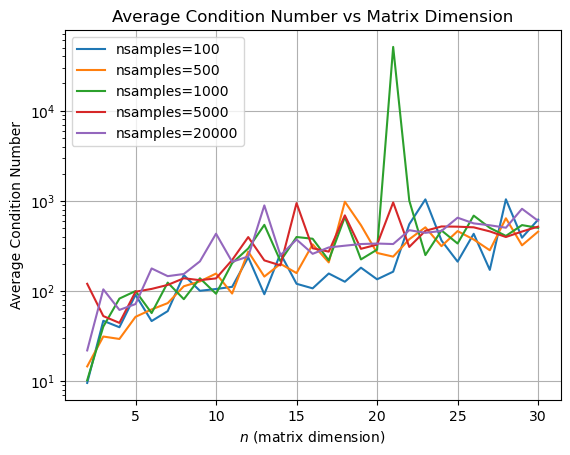

In [28]:
nvals = np.arange(2,31) # range of n-vals
nsamples_values = [100,500,1000,5000,20000]
for nsamples in nsamples_values:
    average_condition_numbers = np.zeros(nvals.size)
    for cnt, nval in enumerate(nvals):
        tot = 0
        for jj in range(nsamples):
            Amat = np.random.randn(nval, nval)
            U,D,V = np.linalg.svd(Amat)
            if D[-1] > 1e-10: # don't include matrices that don't have full rank
                condition_number =  D[0]/D[-1]
                # update your average here 
                average_condition_numbers[cnt] += condition_number
                # keep track of how many terms you're including in your average
                tot += 1
        average_condition_numbers[cnt] /= tot # make sure you compute an average
    plt.plot(nvals, average_condition_numbers, label=f'nsamples={nsamples}')
plt.yscale('log')   
plt.xlabel(r"$n$ (matrix dimension)")
plt.ylabel("Average Condition Number")
plt.title("Average Condition Number vs Matrix Dimension")
plt.legend()
plt.grid(True)
plt.show()


When we increase the number of samples we are using, we can see that the average condition number for an $n x n$ matrix increases at a steady pace. Please don't mind the spike when $\text{nsamples } = 100$, i had to retype all of this quickly to turn it in ://

**Problem 4** (Graduate/Extra Credit): When using the economy SVD, only one of the products $U^{\dagger}U$ and $UU^{\dagger}$ is guaranteed to be the identity,
while the other is a projection. Which is which and why?

$$
r=\operatorname{rank}(A),\quad A\in\mathbb{C}^{m\times n},\quad
U\in\mathbb{C}^{m\times r},\quad V\in\mathbb{C}^{n\times r}.
$$

$$
U^\dagger U\in\mathbb{C}^{r\times r}.
\text{ Columns of }U\text{ are orthonormal }\Rightarrow\ U^\dagger U=I_{r}.
$$

$$
UU^\dagger\in\mathbb{C}^{m\times m},\quad
U^\dagger x=
\begin{bmatrix}
\langle u_1,x\rangle\\ \vdots\\ \langle u_r,x\rangle
\end{bmatrix}
\ \Longrightarrow\
UU^\dagger x
=U
\begin{bmatrix}
\langle u_1,x\rangle\\ \vdots\\ \langle u_r,x\rangle
\end{bmatrix}
=\sum_{i=1}^r \langle u_i,x\rangle\,u_i.
$$

$$
\operatorname{col}(U)=\operatorname{span}\{u_1,\dots,u_r\},\quad
UU^\dagger \text{is a projection, } \neq I_m \text{ unless } r=m.
$$


**Problem 5** (Graduate/Extra Credit): For $m\times n$ complex valued matrix $A$, we define its *Frobenius norm* $\left|\left|A\right|\right|_{F}$ via the formula

$$
\left|\left|A\right|\right|^{2}_{F} = \text{tr}\left(A^{\dagger}A \right).
$$

Using the SVD $A = U\Sigma V^{\dagger}$, show that 

$$
\left|\left|A\right|\right|^{2}_{F} = \sum_{l=1}^{r}\sigma_{l}^{2}, ~ r = \text{rank}(A).
$$


$$
\|A\|_F^2=\operatorname{tr}(A^\dagger A),\ \ A=UDV^\dagger.
$$

$$
\|A\|_F^2
=\operatorname{tr}\!\big((UDV^\dagger)^\dagger(UDV^\dagger)\big)
=\operatorname{tr}\!\big(V D^\dagger U^\dagger U D V^\dagger\big)
=\operatorname{tr}\!\big(V D^\dagger D V^\dagger\big)
=\operatorname{tr}(D^\dagger D)
\quad (\text{cyclic trace property, ty internet}).
$$

$$
D=\operatorname{diag}(\sigma_1,\dots,\sigma_r,0,\dots),\quad
D^\dagger D = \operatorname{diag}(\sigma_1^2,\dots,\sigma_r^2,0,\dots),
$$

$$
\Rightarrow\ \ \|A\|_F^2=\operatorname{tr}(D^\dagger D)=\sum_{i=1}^r \sigma_i^2.\ \square
$$
